## Simulate data

In [1]:
import pandas as pd
import numpy as np
import random

np.random.seed(37)
random.seed(37)

def sample(mean, std_dev, N=100):
    s = np.random.normal(mean, std_dev, N)
    s = np.clip(s, 0, 1)
    s = pd.Series(s)
    return s

df = pd.DataFrame({
    's1': sample(0.4, 0.15),
    's2': sample(0.5, 0.1),
    's3': sample(0.6, 0.2)
})

df.head()

,s1,s2,s3
0,0.391830,0.585214,0.241398
1,0.501146,0.609859,0.534833
2,0.451997,0.471076,0.557154
3,0.204948,0.721115,0.466191
4,0.627777,0.443239,0.701549


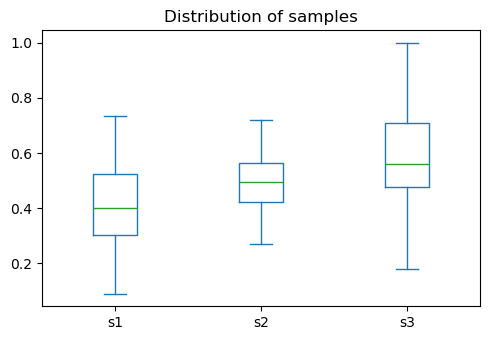

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 3.5))

df.plot(kind='box', ax=ax)
ax.set_title('Distribution of samples')

fig.tight_layout()

## Merge

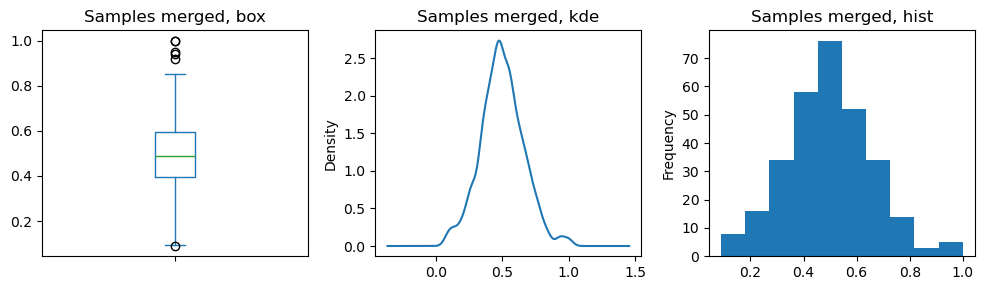

In [3]:
p = pd.Series(np.ravel(df))

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

p.plot(kind='box', ax=ax[0])
p.plot(kind='kde', ax=ax[1], bw_method=0.2)
p.plot(kind='hist', ax=ax[2])

ax[0].set_title('Samples merged, box')
ax[1].set_title('Samples merged, kde')
ax[2].set_title('Samples merged, hist')

fig.tight_layout()

## Best entropy

In [39]:
from sklearn.mixture import GaussianMixture

def l2m(means):
    return {i: m for i, m in enumerate(np.ravel(means))}

def m2o(means):
    return {m: i for i, m in enumerate(sorted(np.ravel(means)))}

def l2o(means):
    _l2m = l2m(means)
    _m2o = m2o(means)
    return {l: _m2o[m] for l, m in _l2m.items()}

def get_entropy(s):
    p = s / s.sum()
    p = np.sum([p_i * np.log2(p_i) for p_i in p])
    p = -p
    return p

def compute_entropy(X, n_components):
    m = GaussianMixture(n_components=n_components, random_state=37)
    m.fit(X)

    lab2ord = l2o(m.means_)
    s = pd.Series(m.predict(X)) \
        .map(lab2ord) \
        .value_counts() \
        .sort_index()
    h = get_entropy(s)
    return h
    
X = pd.DataFrame({'p': p})
H = pd.DataFrame([{'n': n, 'h': compute_entropy(X, n)} for n in range(10, 291)]) \
    .set_index(['n'])
H.shape

(281, 1)

<Axes: xlabel='n'>

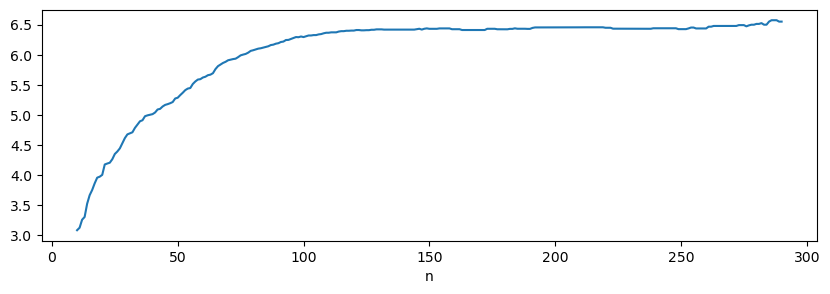

In [40]:
H['h'].plot(kind='line', figsize=(10, 3))

In [41]:
def get_labels(X, n_components):
    m = GaussianMixture(n_components=n_components, random_state=37)
    m.fit(X)
    
    lab2ord = l2o(m.means_)
    s = pd.Series(m.predict(X)) \
        .map(lab2ord) \
        .value_counts() \
        .sort_index()
    h = get_entropy(s)

    return s, h

<Axes: title={'center': 'n=20, H(y)=4.00595'}>

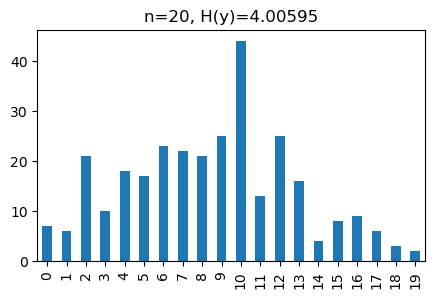

In [42]:
n = 20
s, h = get_labels(X, n)
s.plot(kind='bar', figsize=(5, 3), title=f'n={n}, H(y)={h:.5f}')

<Axes: title={'center': 'n=100, H(y)=6.29341'}>

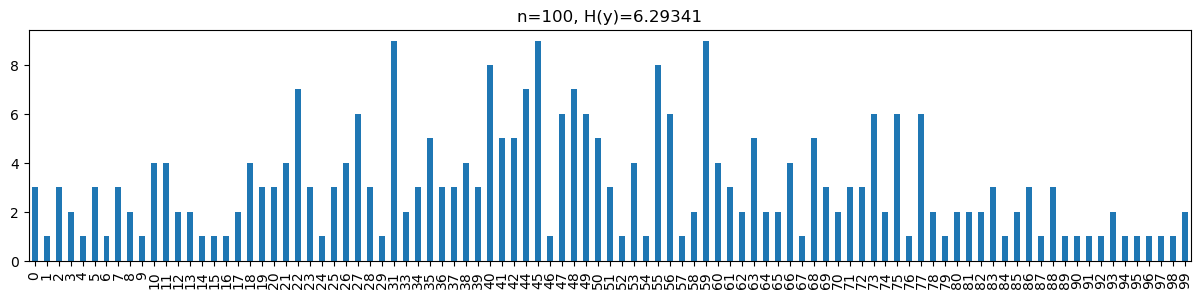

In [43]:
n = 100
s, h = get_labels(X, n)
s.plot(kind='bar', figsize=(15, 3), title=f'n={n}, H(y)={h:.5f}')

<Axes: title={'center': 'n=250, H(y)=6.42513'}>

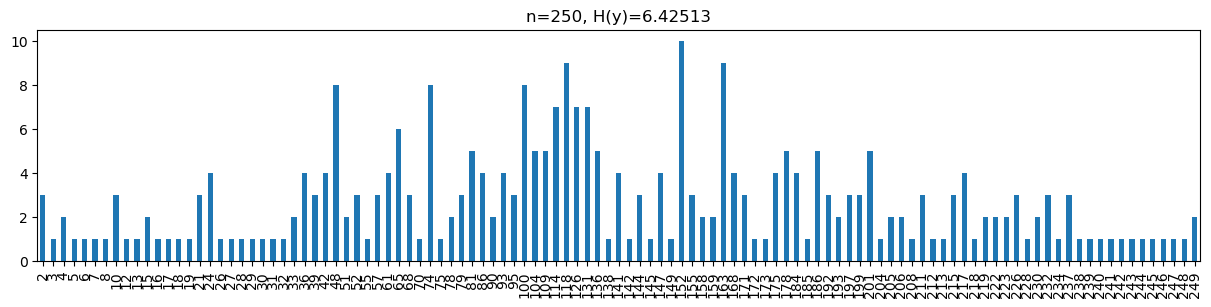

In [44]:
n = 250
s, h = get_labels(X, n)
s.plot(kind='bar', figsize=(15, 3), title=f'n={n}, H(y)={h:.5f}')